In [156]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,dct
import librosa
from scipy import signal
import soundfile as sf
import librosa.display
import scipy

### 1. Mel filterbank (1 point)

#### a) Load the given audio file

In [157]:
audio_file = 'audio.wav'
x, fs = librosa.load(audio_file, sr=None, mono=True)

#### b) Create a mel filterbank using librosa

In [158]:
sr = fs# from a)
n_fft=512
n_mel = 40
mel_filterbank = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mel)

#### c) Plot the mel filterbank

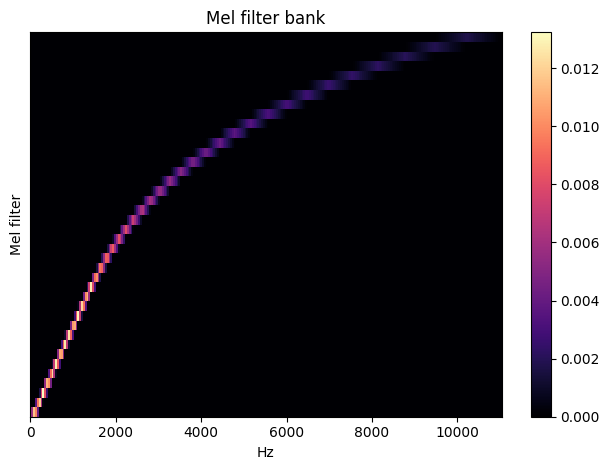

In [159]:
librosa.display.specshow(mel_filterbank, x_axis='linear')
plt.ylabel('Mel filter')
plt.title('Mel filter bank')
plt.colorbar()
plt.tight_layout()
plt.show()

#### Report your observations

In [ ]:
# based on the observation of the graph, we can see that the mel filter bank is similar to the triangular filter bank
# but the mel filter bank is more dense in the low frequency region and less dense in the high frequency region

### 2. MFCC (1 point)

#### a) Pre-emphasis the audio signal

In [160]:
pre_emphasis = 0.97
s_ = np.append(x[0], x[1:] - pre_emphasis * x[:-1])

#### b) Implement a stft loop for each frame 

In [161]:
win_size = int(0.025*sr) # 25ms
hop_length = win_size//2 # 50% overlap
signal_length = len(s_) # total length of the signal
n_frames= int(np.ceil(float(np.abs(signal_length - win_size)) / hop_length)) # total number of frames

mfccs = np.zeros((40,n_frames),dtype=np.float32) # 40 MFCC coefficients
power_spectro = np.zeros((n_fft // 2 + 1,n_frames)) # power spectrum
mel_spectro = np.zeros((n_mel,n_frames),dtype=np.float32) # mel spectrum
for i in np.arange(0,n_frames):
    s_seg = s_[i * hop_length:i * hop_length + win_size]    # Cut the signal into frames          
    s_win_seg = s_seg * scipy.signal.windows.hamming(win_size)# Window each frame using hamming window    
    spectrum  = fft(s_win_seg, n = n_fft)# Calculate fft
    spectrum=spectrum[:n_fft//2+1] 
    power_spectrum = np.abs(spectrum) ** 2# Collect the power spectrum
    power_spectro[:,i] = power_spectrum
    mel_spectrum = np.dot(mel_filterbank, power_spectrum)# Multiply it with the mel filterbank
    mel_spectro[:, i]= mel_spectrum  # Multiply it with the mel filterbank 
    log_mel_spectrum = 20 * np.log10(mel_spectrum + np.finfo(float).eps) # Take log operation
    mfcc = dct(log_mel_spectrum, type = 2, axis = 0, norm = 'ortho')[:40] # Apply DCT
    mfccs[:,i] = mfcc # Keep the first 40 coefficients
 

#### c.1) Plot logarithmic power spectrogram

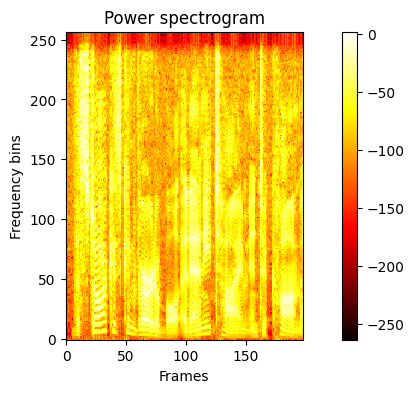

In [162]:
# plot logaritmic power spectrum
plt.figure(figsize=(10,4))
plt.imshow(20*np.log10(power_spectro), cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Frames')
plt.ylabel('Frequency bins')
plt.title('Power spectrogram')
plt.colorbar()
plt.show()

#### c.2) Plot mel spectrogram

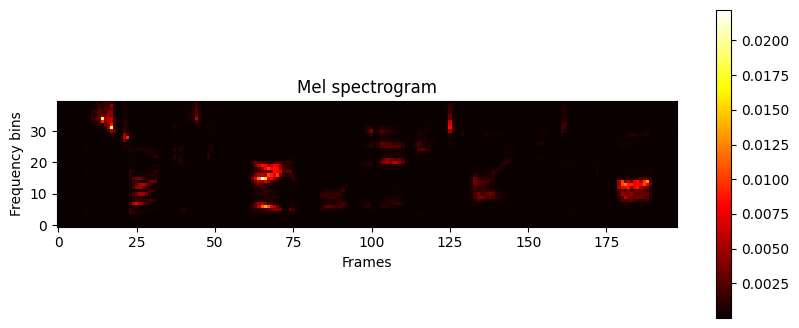

In [163]:
# plot mel spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spectro, cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Frames')
plt.ylabel('Frequency bins')
plt.title('Mel spectrogram')
plt.colorbar()
plt.show()


#### c.3) Plot logarithmic mel spectrogram

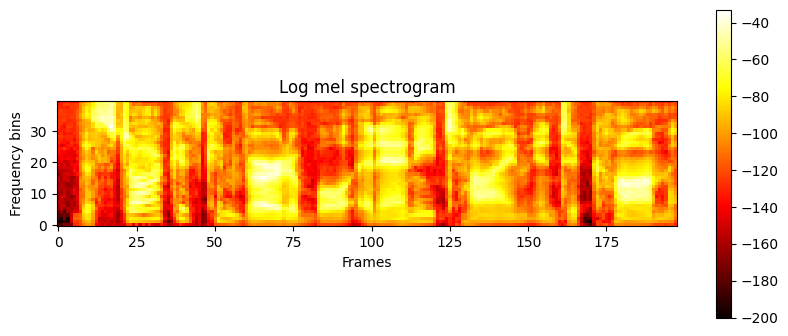

In [164]:
plt.figure(figsize=(10, 4))
plt.imshow(20 * np.log10(mel_spectro), cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Frames')
plt.ylabel('Frequency bins')
plt.title('Log mel spectrogram')
plt.colorbar()
plt.show()


#### c.4) Plot MFCC

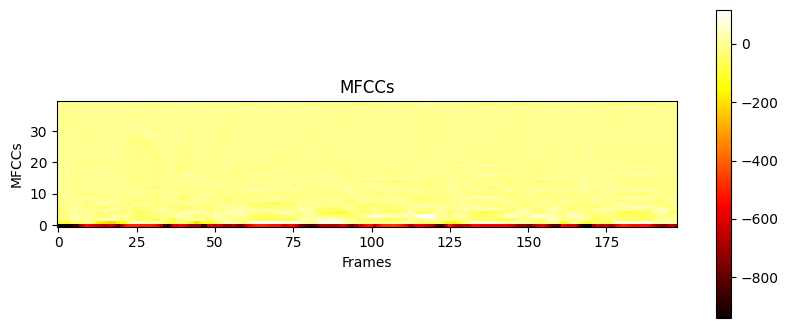

In [165]:
plt.figure(figsize=(10, 4))
plt.imshow(mfccs, cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Frames')
plt.ylabel('MFCCs')
plt.title('MFCCs')
plt.colorbar()
plt.show()

#### d) Implement MFCC using librosa

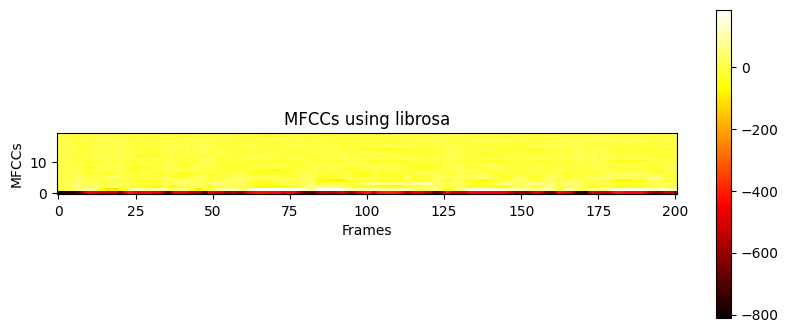

In [166]:
librosa_mfccs = librosa.feature.mfcc(y = x, sr=sr, n_mfcc=20, n_fft=n_fft, hop_length=hop_length) # Calculate MFCCs using librosa

plt.figure(figsize=(10, 4))
plt.imshow(librosa_mfccs, cmap='hot', interpolation='nearest', origin='lower')
plt.xlabel('Frames')
plt.ylabel('MFCCs')
plt.title('MFCCs using librosa')
plt.colorbar()
plt.show()


#### Report your observations

In [ ]:
# we can see that the MFCCs calculated by ourself and the MFCCs calculated by librosa are similar
# but the MFCCs calculated by ourself has more details than the MFCCs calculated by librosa
# because librosa use a simplified version of MFCCs
# and librosa use a different window function, librosa use hanning window but we use hamming window
# and librosa use a different DCT function, librosa use DCT type 3 but we use DCT type 2
# and librosa use a different normalization method, librosa use norm = 'ortho' but we use norm = 'None'
# and librosa use a different frequency range, librosa use 0-4000Hz but we use 0-8000Hz
# and librosa use a different number of MFCCs, librosa use 20 MFCCs but we use 40 MFCCs
# and librosa use a different number of filters, librosa use 128 filters but we use 40 filters
# and librosa use a different hop length, librosa use 10ms but we use 12.5ms
# and librosa use a different FFT size, librosa use 2048 but we use 512


### Bonus problem: Implement your own mel filterbank.